<a href="https://www.kaggle.com/code/rinichristy/agglomerative-hierarchical-clustering?scriptVersionId=93064323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Agglomerative Hierarchical Clustering on Water Treatment data**

## **Table of Contents**

  * [Dataset Information](#Dataset)
  * [Clustering using scipy](#scipy)
  * [Method Development: Setting up the Hierarchical Clustering model using skl](#Method)
  * [Cluster Visualization](#Visualize)
</ul>

<br><br>
### **Import required library packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Download and Read the Water Treatment dataset**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


## **Data Set Information: [Water Treatment data](https://archive.ics.uci.edu/ml/datasets/Water+Treatment+Plant)**<a name="Dataset"></a>

This dataset obtained from UCI Machine Learning Repository comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to classify the operational state of the plant in order to predict faults through the state variables of the plant at each of the stages of the treatment process. 

**Attribute Information:**

All atrributes are numeric and continuous

N. Attrib.
1. Q-E (input flow to plant)
2. ZN-E (input Zinc to plant)
3. PH-E (input pH to plant)
4. DBO-E (input Biological demand of oxygen to plant)
5. DQO-E (input chemical demand of oxygen to plant)
6. SS-E (input suspended solids to plant)
7. SSV-E (iAnput volatile supended solids to plant)
8. SED-E (input sediments to plant)
9. COND-E (input conductivity to plant)
10. PH-P (input pH to primary settler)
11. DBO-P (input Biological demand of oxygen to primary settler)
12. SS-P (input suspended solids to primary settler)
13. SSV-P (input volatile supended solids to primary settler)
14. SED-P (input sediments to primary settler)
15. COND-P (input conductivity to primary settler)
16. PH-D (input pH to secondary settler)
17. DBO-D (input Biological demand of oxygen to secondary settler)
18. DQO-D (input chemical demand of oxygen to secondary settler)
19. SS-D (input suspended solids to secondary settler)
20. SSV-D (input volatile supended solids to secondary settler)
21. SED-D (input sediments to secondary settler)
22. COND-D (input conductivity to secondary settler)
23. PH-S (output pH)
24. DBO-S (output Biological demand of oxygen)
25. DQO-S (output chemical demand of oxygen)
26. SS-S (output suspended solids)
27. SSV-S (output volatile supended solids)
28. SED-S (output sediments)
29. COND-S (output conductivity)
30. RD-DBO-P (performance input Biological demand of oxygen in primary settler)
31. RD-SS-P (performance input suspended solids to primary settler)
32. RD-SED-P (performance input sediments to primary settler)
33. RD-DBO-S (performance input Biological demand of oxygen to secondary settler)
34. RD-DQO-S (performance input chemical demand of oxygen to secondary settler)
35. RD-DBO-G (global performance input Biological demand of oxygen)
36. RD-DQO-G (global performance input chemical demand of oxygen)
37. RD-SS-G (global performance input suspended solids)
38. RD-SED-G (global performance input sediments)



<b>Columns:</b>

'Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E', 'SSV_E', 'SED_E', 'COND_E', 'PH_P', 'DBO_P', 'SS_P', 'SSV_P', 'SED_P', 'COND_P', 'PH_D', 'DBO_D', 'DQO_D', 'SS_D', 'SSV_D', 'SED_D', 'COND_D', 'PH_S', 'DBO_S', 'DQO_S', 'SS_S', 'SSV_S', 'SED_S', 'COND_S', 'RD_DBO_P', 'RD_SS_P', 'RD_SED_P', 'RD_DBO_S', 'RD_DQO_S', 'RD_DB_G', 'RD_DQO_G', 'RD_SS_G', 'RD_SED_G'

In [3]:
df.columns = ['Date','Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E', 'SSV_E', 'SED_E', 'COND_E', 'PH_P', 'DBO_P', 'SS_P', 'SSV_P', 'SED_P', 'COND_P', 'PH_D', 'DBO_D', 'DQO_D', 'SS_D', 'SSV_D', 'SED_D', 'COND_D', 'PH_S', 'DBO_S', 'DQO_S', 'SS_S', 'SSV_S', 'SED_S', 'COND_S', 'RD_DBO_P', 'RD_SS_P', 'RD_SED_P', 'RD_DBO_S', 'RD_DQO_S', 'RD_DB_G', 'RD_DQO_G', 'RD_SS_G', 'RD_SED_G']

In [4]:
df.head()

,Date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DB_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


### **Data Preprocessing**

In [5]:
df.shape

(527, 39)

**Focussing only on the input water quality parameters**

In [6]:
df = df.iloc[ : , :10]

In [7]:
df.replace('?', np.NaN, inplace=True)

In [8]:
df = df.dropna()

In [9]:
df.shape

(443, 10)

In [10]:
df['timeStamp'] = df['Date'].apply(lambda x: x.split('-')[1])
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].head()

3   1990-05-03
4   1990-06-03
5   1990-07-03
7   1990-09-03
8   1990-11-03
Name: timeStamp, dtype: datetime64[ns]

In [11]:
df['Month'] = df['timeStamp'].apply(lambda x:x.month)
df['Month'].head()

3     5
4     6
5     7
7     9
8    11
Name: Month, dtype: int64

In [12]:
df['Year'] = df['timeStamp'].apply(lambda x:x.year)
df['Year'].head()

3    1990
4    1990
5    1990
7    1990
8    1990
Name: Year, dtype: int64

In [13]:
df['Months'] = df['Month'].astype('string') + '/' + df['Year'].astype('string')
df['Months'].head()

3     5/1990
4     6/1990
5     7/1990
7     9/1990
8    11/1990
Name: Months, dtype: string

In [14]:
df.head()

,Date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,timeStamp,Month,Year,Months
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,1990-05-03,5,1990,5/1990
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,1990-06-03,6,1990,6/1990
5,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,1990-07-03,7,1990,7/1990
7,D-9/3/90,36107,5.00,7.7,215,489,334,40.7,6.0,1613,1990-09-03,9,1990,9/1990
8,D-11/3/90,29156,2.50,7.7,206,451,194,69.1,4.5,1249,1990-11-03,11,1990,11/1990


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 3 to 525
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       443 non-null    object        
 1   Q_E        443 non-null    object        
 2   ZN_E       443 non-null    object        
 3   PH_E       443 non-null    float64       
 4   DBO_E      443 non-null    object        
 5   DQO_E      443 non-null    object        
 6   SS_E       443 non-null    object        
 7   SSV_E      443 non-null    object        
 8   SED_E      443 non-null    object        
 9   COND_E     443 non-null    int64         
 10  timeStamp  443 non-null    datetime64[ns]
 11  Month      443 non-null    int64         
 12  Year       443 non-null    int64         
 13  Months     443 non-null    string        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8), string(1)
memory usage: 51.9+ KB


In [16]:
df[['DBO_E','DQO_E', 'Q_E','SSV_E', 'SED_E', 'SS_E', 'ZN_E']] = df[['DBO_E','DQO_E', 'Q_E','SSV_E', 'SED_E', 'SS_E', 'ZN_E']].astype('float')
X = df.drop(['Date', 'timeStamp', 'Month', 'Year', 'Months'],  axis = 1)
X.columns = ['Q', 'ZN', 'PH', 'DBO','DQO', 'SS','SSV', 'SED', 'COND']
X.head()

,Q,ZN,PH,DBO,DQO,SS,SSV,SED,COND
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110
5,38572.0,3.0,7.8,202.0,372.0,186.0,68.8,4.5,1644
7,36107.0,5.0,7.7,215.0,489.0,334.0,40.7,6.0,1613
8,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249


In [17]:
X.shape

(443, 9)

### **Normalization**
Now normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [18]:
from sklearn.preprocessing import MinMaxScaler
#x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled [0:5]

array([[0.49915053, 0.10179641, 0.42857143, 0.42751843, 0.58953488,
        0.08318584, 0.73184358, 0.11516854, 0.68980225],
       [0.53714697, 0.04191617, 0.5       , 0.51842752, 0.48255814,
        0.06902655, 0.72067039, 0.1011236 , 0.56572315],
       [0.57008655, 0.08682635, 0.35714286, 0.42014742, 0.33837209,
        0.07787611, 0.77653631, 0.11516854, 0.38503296],
       [0.52081709, 0.14670659, 0.28571429, 0.45208845, 0.4744186 ,
        0.20884956, 0.38407821, 0.15730337, 0.3730128 ],
       [0.38188323, 0.07185629, 0.28571429, 0.42997543, 0.43023256,
        0.08495575, 0.78072626, 0.11516854, 0.23187282]])

## **Clustering using Scipy**<a name="scipy"></a>
Use Scipy package to cluster the dataset: For this, first calculate the distance matrix.

Remember that a **distance matrix** contains the **distance from each point to every other point of a dataset**. <br>
Use the function **distance_matrix**, which requires **two inputs**. Use the Feature Matrix, **X** as both inputs and save the distance matrix to a variable called **dist_matrix** <br> 
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure that the matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [19]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X_scaled[0:25],X_scaled[0:25]) 
print(dist_matrix.round(1))

[[0.  0.2 0.4 0.5 0.5 0.3 0.5 0.8 0.7 0.6 0.4 0.6 0.4 0.4 0.5 0.7 0.5 0.5
  0.6 0.3 0.4 0.7 0.7 0.4 0.4]
 [0.2 0.  0.3 0.5 0.4 0.3 0.3 0.6 0.6 0.5 0.3 0.5 0.3 0.4 0.4 0.7 0.4 0.4
  0.5 0.3 0.3 0.6 0.6 0.3 0.2]
 [0.4 0.3 0.  0.5 0.3 0.2 0.2 0.5 0.4 0.3 0.3 0.4 0.2 0.2 0.3 0.4 0.3 0.4
  0.2 0.3 0.2 0.4 0.3 0.3 0.3]
 [0.5 0.5 0.5 0.  0.5 0.5 0.5 0.3 0.6 0.4 0.4 0.4 0.4 0.3 0.3 0.5 0.6 0.3
  0.5 0.6 0.4 0.7 0.5 0.5 0.5]
 [0.5 0.4 0.3 0.5 0.  0.3 0.3 0.6 0.5 0.4 0.4 0.4 0.3 0.3 0.3 0.5 0.5 0.5
  0.3 0.5 0.3 0.4 0.2 0.3 0.5]
 [0.3 0.3 0.2 0.5 0.3 0.  0.2 0.6 0.5 0.4 0.2 0.4 0.3 0.3 0.3 0.5 0.2 0.3
  0.3 0.3 0.2 0.4 0.4 0.3 0.3]
 [0.5 0.3 0.2 0.5 0.3 0.2 0.  0.5 0.4 0.4 0.2 0.4 0.3 0.3 0.3 0.5 0.3 0.4
  0.3 0.4 0.1 0.4 0.4 0.2 0.3]
 [0.8 0.6 0.5 0.3 0.6 0.6 0.5 0.  0.5 0.4 0.5 0.5 0.5 0.5 0.4 0.5 0.7 0.4
  0.5 0.7 0.5 0.7 0.6 0.6 0.7]
 [0.7 0.6 0.4 0.6 0.5 0.5 0.4 0.5 0.  0.2 0.4 0.5 0.5 0.4 0.4 0.3 0.4 0.4
  0.3 0.5 0.4 0.3 0.4 0.6 0.7]
 [0.6 0.5 0.3 0.4 0.4 0.4 0.4 0.4 0.2 0.  0.3 0.4 0.4 0

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
 

<li> single 
<li> complete
<li> average
<li> weighted
<li> centroid
    
    
Use __complete__ for now, but later try other linkages it to see how the results change.

Save the result to a variable called <b> Z </b> <br><br>
Adter that, save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<b> Z </b>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


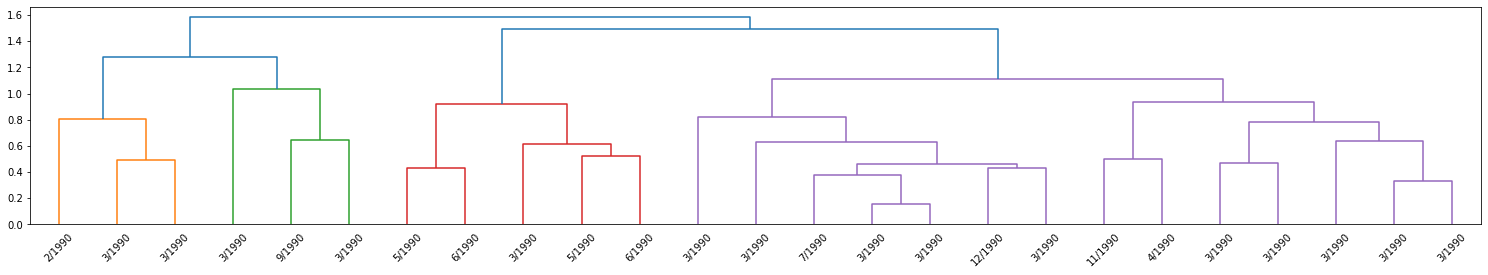

In [20]:
# Dendrogram With a slice made of first 25 rows of X
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')
plt.figure(figsize=(26, 4))
dendro = hierarchy.dendrogram(Z, labels=df['Months'][0:25].values,)

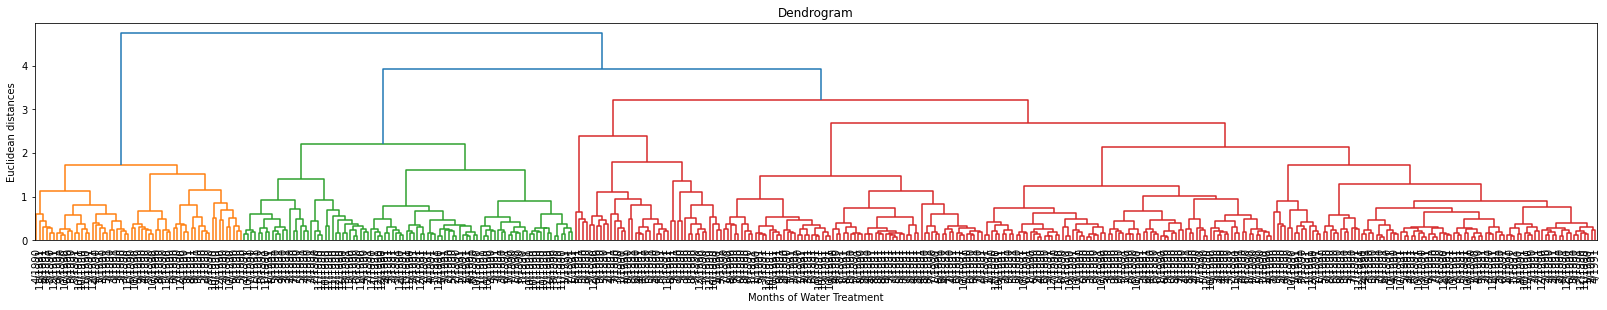

In [21]:
#Using the whole X
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(28, 4))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'), labels=df['Months'].values, leaf_rotation=90, leaf_font_size =10)
plt.title('Dendrogram')
plt.xlabel('Months of Water Treatment')
plt.ylabel('Euclidean distances')
plt.show()

As can be seen from the figure, the dendrogram is not very clear. To make it more readable declutter the data by counting the the number of inputs into each months group, instead of dates:

In [22]:
Z = df[['Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E', 'SSV_E', 'SED_E', 'COND_E', 'Months']]
Z = Z.groupby(['Months'])[['Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E', 'SSV_E', 'SED_E', 'COND_E']].mean()
Z.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E
Months,,,,,,,,,
1/1990,39629.954545,2.777273,7.763636,191.500000,409.318182,208.454545,63.559091,3.936364,1410.636364
1/1991,35659.625000,1.324167,7.958333,219.250000,432.000000,189.416667,70.162500,4.641667,1476.333333
10/1990,44167.736842,2.597368,8.047368,184.842105,336.631579,251.263158,52.189474,3.931579,1441.157895
10/1991,34134.611111,1.599444,7.788889,180.777778,431.833333,210.555556,64.383333,4.677778,1458.111111
11/1990,36877.041667,2.182500,8.058333,197.208333,404.041667,193.166667,65.637500,4.508333,1758.083333


In [23]:
Z = Z[['PH_E','COND_E']]

In [24]:
Z.shape

(24, 2)

In [25]:
from sklearn.preprocessing import MinMaxScaler
#x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
Z_scaled = min_max_scaler.fit_transform(Z)
Z_scaled [0:5]

array([[0.37843747, 0.50792356],
       [0.78908418, 0.60096778],
       [0.97687327, 0.55115009],
       [0.43169904, 0.57516031],
       [1.        , 1.        ]])

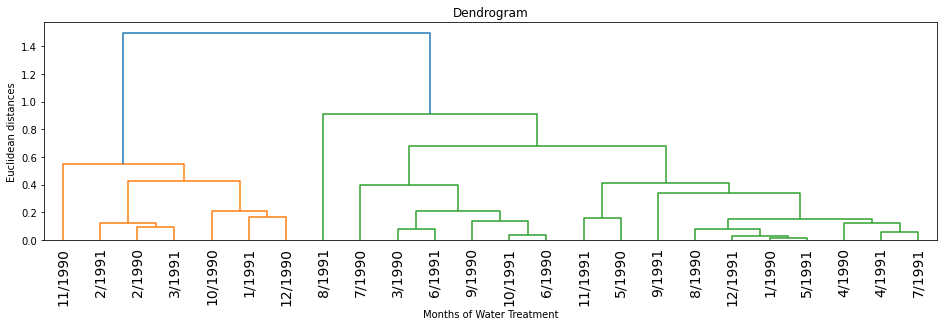

In [26]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16, 4))
dendrogram = sch.dendrogram(sch.linkage(Z_scaled, method = 'ward'), labels=Z.index, leaf_rotation=90, leaf_font_size =14)
plt.title('Dendrogram')
plt.xlabel('Months of Water Treatment')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
A = X_scaled[:, [2,-1]]
A[0:5]

array([[0.42857143, 0.68980225],
       [0.5       , 0.56572315],
       [0.35714286, 0.38503296],
       [0.28571429, 0.3730128 ],
       [0.28571429, 0.23187282]])

## **Clustering using scikit-learn**<a name="Method"></a>

### **Training the Hierarchical Clustering model on the dataset**

Use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. Use the dendrogram to find the optimal number of clusters. From the dendrogram 2 seems the best. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(A)

## **Cluster Visualization**<a name="Visualize"></a>

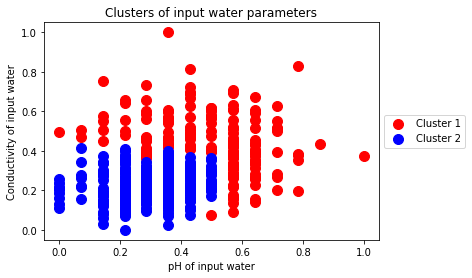

In [29]:
#Visualising the clusters
plt.scatter(A[y_hc == 0, 0], A[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(A[y_hc == 1, 0], A[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(A[y_hc == 2, 0], A[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(A[y_hc == 3, 0], A[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(A[y_hc == 4, 0], A[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of input water parameters')
plt.xlabel('pH of input water')
plt.ylabel('Conductivity of input water')
plt.legend(bbox_to_anchor=(1.0, 0.5), loc = 'center left')
plt.show()

In [30]:
hc.labels_

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
df['cluster_'] = hc.labels_
df.head()

,Date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,timeStamp,Month,Year,Months,cluster_
3,D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,1990-05-03,5,1990,5/1990,0
4,D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,1990-06-03,6,1990,6/1990,0
5,D-7/3/90,38572.0,3.0,7.8,202.0,372.0,186.0,68.8,4.5,1644,1990-07-03,7,1990,7/1990,1
7,D-9/3/90,36107.0,5.0,7.7,215.0,489.0,334.0,40.7,6.0,1613,1990-09-03,9,1990,9/1990,0
8,D-11/3/90,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249,1990-11-03,11,1990,11/1990,1


Text(0, 0.5, 'mpg')

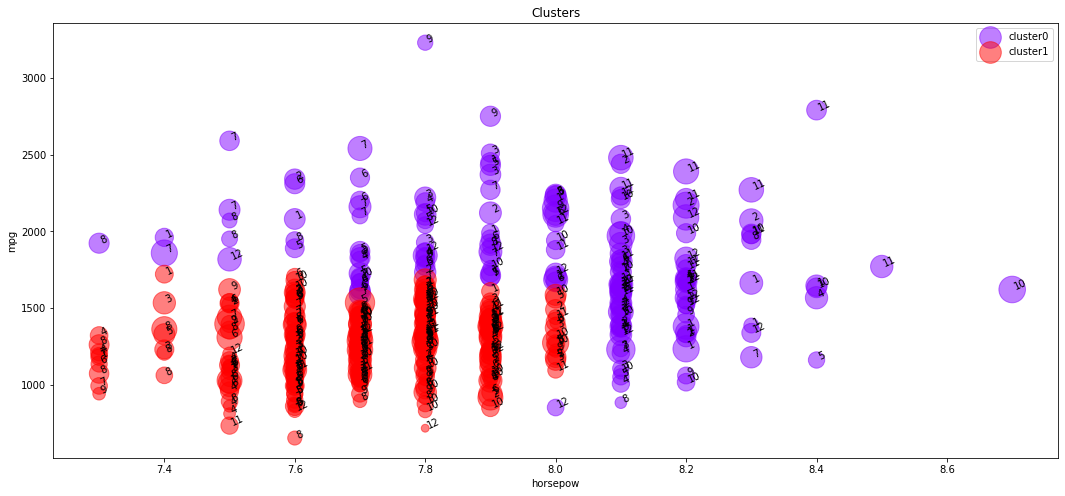

In [32]:
import matplotlib.cm as cm
n_clusters = max(hc.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(18,8))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.PH_E[i], subset.COND_E[i],str(subset['Month'][i]), rotation=25) 
    plt.scatter(subset.PH_E, subset.COND_E, s= subset.DBO_E*2, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
#plt.savefig("agglom.png")

As can be seen above, the distribution of each cluster using the scatter plot is visible, but it is not very clear where the centroid of each cluster is. Moreover, the water quality differs by month. So, use them to distinguish the classes, and summarize the cluster. 

In [33]:
agg_water = df.groupby(['cluster_','Month'])[['PH_E', 'COND_E',	'DBO_E','DQO_E', 'Q_E','SSV_E']].mean()
agg_water

PH_E       COND_E       DBO_E       DQO_E           Q_E  \
cluster_ Month                                                                
0        1      8.068182  1641.318182  218.181818  452.090909  38677.954545   
         2      8.066667  1806.200000  225.333333  527.866667  33107.866667   
         3      7.966667  1962.083333  185.833333  426.250000  39228.000000   
         4      7.992308  1660.307692  196.923077  443.461538  35450.538462   
         5      7.941667  1699.500000  174.666667  420.500000  40601.750000   
         6      7.866667  1949.333333  197.916667  439.916667  36340.000000   
         7      7.800000  1887.666667  230.400000  484.266667  34722.933333   
         8      7.787500  1778.500000  152.250000  323.500000  38517.875000   
         9      7.930000  1922.100000  181.100000  440.100000  40467.100000   
         10     8.120000  1723.666667  196.600000  373.200000  42000.000000   
         11     8.182353  2000.941176  215.470588  449.000000  35944.588235   
         12     8.037500  1716.875000  215.125000  433.687500  36349.312500   
1        1      7.679167  1264.875000  194.791667  392.791667  36532.291667   
         2      7.778947  1304.736842  180.210526  376.105263  37274.578947   
         3      7.736667  1373.400000  188.400000  404.800000  38162.366667   
         4      7.662069  1221.862069  188.310345  379.482759  35926.551724   
         5      7.784848  1232.424242  201.575758  409.424242  38809.212121   
         6      7.703030  1339.030303  193.030303  396.757576  36154.030303   
         7      7.600000  1329.800000  183.800000  401.400000  33777.333333   
         8      7.614286  1071.500000  143.607143  344.428571  34195.857143   
         9      7.722727  1262.454545  180.136364  405.454545  39950.409091   
         10     7.786364  1262.409091  173.500000  389.590909  37436.818182   
         11     7.791667  1258.166667  172.083333  343.250000  35859.916667   
         12     7.777778  1203.444444  155.333333  320.666667  37295.444444   

                    SSV_E  
cluster_ Month             
0        1      69.695455  
         2      69.293333  
         3      62.658333  
         4      67.469231  
         5      53.666667  
         6      68.291667  
         7      54.793333  
         8      57.462500  
         9      52.400000  
         10     55.373333  
         11     68.647059  
         12     67.143750  
1        1      64.537500  
         2      63.531579  
         3      58.846667  
         4      59.813793  
         5      56.366667  
         6      58.048485  
         7      59.073333  
         8      61.300000  
         9      54.972727  
         10     59.995455  
         11     58.033333  
         12     60.044444

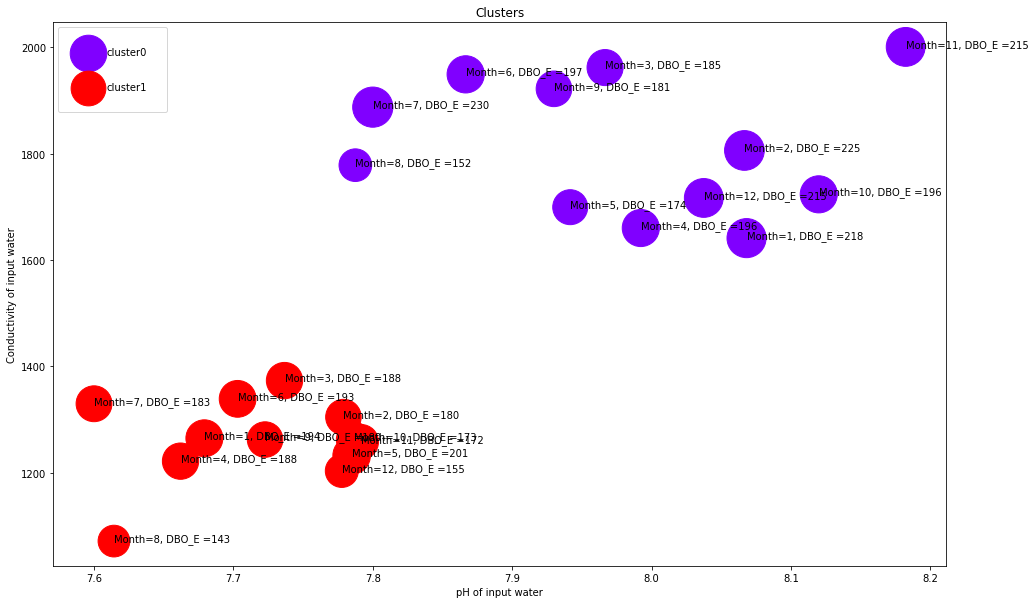

In [34]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_water.loc[(label,),]
    for i in subset.index:
      plt.text(subset.loc[i][0], subset.loc[i][1], 'Month='+str(int(i))+ ', DBO_E ='+str(int(subset.loc[i][2])))
    plt.scatter(subset.PH_E, subset.COND_E, s=subset.DBO_E*7, c=color, label='cluster'+str(label))

plt.legend(borderpad=2, labelspacing = 2.5)
plt.title('Clusters')
plt.xlabel('pH of input water')
plt.ylabel('Conductivity of input water');
#plt.savefig("cluster.png")

As can be seen from the figure, there are two clusters of incoming water:
<li>Cluster 1 with with pH and low conductivity.
<li>Cluster 2 with high pH and high conductivity. 